In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import tqdm
import multiprocessing as mproc

import seaborn as sns

import util
import dtaidistance.dtw
from dtaidistance import dtw_visualisation as dtwvis

experiments = [{'dist_type': 'fit','n_bins': 3000, 'predefined_dists': True},
               {'dist_type': 'empirical','n_bins': 3000, 'predefined_dists': True}
              ]

In [6]:
def process_sample_input(input):
    results = {}
    tweets_per_file = util.load_data(**input)
    if len(tweets_per_file) == 0:
        return

    for e in experiments:
        d_type = e['dist_type']
        args = (e['n_bins'], tweets_per_file, d_type, e['predefined_dists'])
        results[d_type] = util.run(args)
        
    filename = f'../results/detect_drifts_m_{input["month"]}_' \
                + f'd_{input["days_range"][0]}_' \
                + f'{input["days_range"][1]}' \
                + f'_{int(time.time())}.pkl'
    pd.to_pickle(results, filename)
    print(filename)


In [7]:
input_params_full = []
for month in range(8,13):
    input_params_month = []
    for week in range(5):
        input_params_month.append(
            {   'days_range': (week*7+1,(week+1)*7+1 if week < 4 else 32), 
                'month': month,
                'hours_range': (0,24),
            }
        )
    input_params_full.append(input_params_month)

In [8]:
for input_month_params in input_params_full:
    args_gen = (input for input in input_month_params)
    p = mproc.Pool(processes=5)
    results = p.imap(process_sample_input, args_gen)

    tqdm.tqdm(total=len(input_month_params))

    p.close()
    p.join()

100%|██████████| 72/72 [08:16<00:00,  6.89s/it]


Number of tweets processed:  855558


100%|██████████| 168/168 [19:27<00:00,  6.95s/it]


Number of tweets processed:  2272138


100%|██████████| 168/168 [21:41<00:00,  7.75s/it]


Number of tweets processed:  2000995


100%|██████████| 72/72 [39:33<00:00, 32.97s/it]it]


Number of tweets processed:  855558
../results/detect_drifts_m_8_d_29_32_1683392343.pkl


100%|██████████| 168/168 [1:36:56<00:00, 34.62s/it] 


Number of tweets processed:  2272138
../results/detect_drifts_m_8_d_22_29_1683396458.pkl


100%|██████████| 168/168 [1:44:44<00:00, 37.41s/it]


Number of tweets processed:  2000995
../results/detect_drifts_m_8_d_15_22_1683397061.pkl


100%|██████████| 48/48 [06:54<00:00,  8.64s/it]


Number of tweets processed:  540991


100%|██████████| 168/168 [23:34<00:00,  8.42s/it]


Number of tweets processed:  1925345


100%|██████████| 168/168 [26:42<00:00,  9.54s/it]


Number of tweets processed:  2086070


100%|██████████| 168/168 [29:43<00:00, 10.62s/it]


Number of tweets processed:  2198696


100%|██████████| 168/168 [31:07<00:00, 11.12s/it]


Number of tweets processed:  1958660


100%|██████████| 48/48 [39:35<00:00, 49.48s/it]it]


Number of tweets processed:  540991
../results/detect_drifts_m_9_d_29_32_1683399852.pkl


100%|██████████| 168/168 [1:58:40<00:00, 42.38s/it]  


Number of tweets processed:  1925345
../results/detect_drifts_m_9_d_22_29_1683405600.pkl


100%|██████████| 168/168 [1:53:55<00:00, 40.69s/it]


Number of tweets processed:  1958660
../results/detect_drifts_m_9_d_1_8_1683405769.pkl


100%|██████████| 168/168 [2:10:11<00:00, 46.50s/it]


Number of tweets processed:  2086070
../results/detect_drifts_m_9_d_15_22_1683406480.pkl


100%|██████████| 168/168 [2:21:18<00:00, 50.47s/it]


Number of tweets processed:  2198696
../results/detect_drifts_m_9_d_8_15_1683407329.pkl


100%|██████████| 72/72 [11:36<00:00,  9.67s/it]


Number of tweets processed:  808244


100%|██████████| 168/168 [24:46<00:00,  8.85s/it]


Number of tweets processed:  2001782


100%|██████████| 168/168 [25:53<00:00,  9.25s/it]


Number of tweets processed:  2058536


100%|██████████| 168/168 [32:53<00:00, 11.75s/it]


Number of tweets processed:  2436199


100%|██████████| 168/168 [42:00<00:00, 15.00s/it]


Number of tweets processed:  3118190


100%|██████████| 72/72 [1:20:50<00:00, 67.36s/it]it]]


Number of tweets processed:  808244
../results/detect_drifts_m_10_d_29_32_1683412878.pkl


 69%|██████▉   | 116/168 [1:37:05<50:43, 58.52s/it]]]

In [5]:
!shutdown

Shutdown scheduled for Sat 2023-05-06 03:14:51 -03, use 'shutdown -c' to cancel.


In [2]:
results = pd.read_pickle('../results/detect_drifts_m_6_d_8_15_1683343442.pkl')

results_times = {}
results_drifts = {}
dtw_dist_vs_minibatch = {}
dtw_fit_vs_empirical = {}

for exp_type in results:
    results_drifts[exp_type] = results[exp_type][0]
    results_times[exp_type] = results[exp_type][1]

    dtw_dist_vs_minibatch[exp_type] = {k:dtaidistance.dtw.distance(results_drifts[exp_type].get(k, []), results_drifts[exp_type]['mini-batch'])
                                       for k in util.approx_methods}


dtw_fit_vs_empirical = {'DTW - Fit vs Empirical':
                          {k:dtaidistance.dtw.distance(results_drifts['fit'].get(k, []), results_drifts['empirical'].get(k, []))
                                for k in results_drifts['fit'].keys()},
                        'qtd drifts Fit':
                          {k:len(results_drifts['fit'][k]) for k in results_drifts['fit'].keys()},
                        'qtd drifts Empirical':
                          {k:len(results_drifts['empirical'][k]) for k in results_drifts['fit'].keys()}
                        }


In [3]:
display(pd.DataFrame(results_times))

display(pd.DataFrame(dtw_fit_vs_empirical))

display(pd.DataFrame(dtw_dist_vs_minibatch))

,fit,empirical
Page Hinkley,1.626972,2.681418
GreedyKS,2.430166,895.863436
Reservoir Sampling,252.867729,4971.683418
IKS + RS,55.406797,105.296142


,DTW - Fit vs Empirical,qtd drifts Fit,qtd drifts Empirical
Page Hinkley,0.000000,166,166
GreedyKS,38322.080737,167,166
Reservoir Sampling,815843.371291,158,62
IKS + RS,714030.938340,80,37
mini-batch,59564.242461,167,144


,fit,empirical
Page Hinkley,6.301694e+04,74733.912878
GreedyKS,1.090042e+04,58069.326516
Reservoir Sampling,8.082802e+04,683052.339500
IKS + RS,1.818142e+06,745402.886598


GreedyKS
Reservoir Sampling
IKS + RS
mini-batch


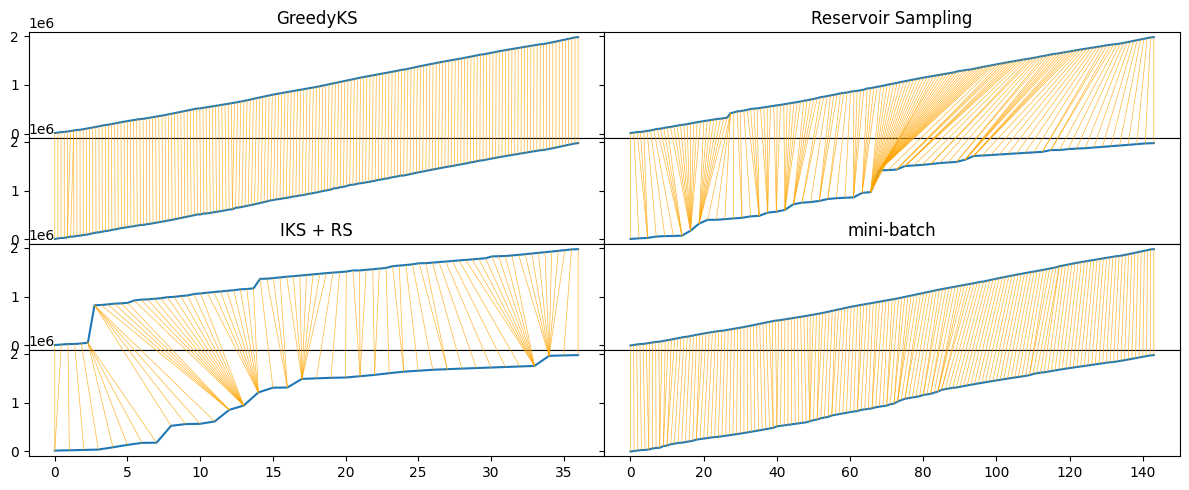

In [4]:
f_vs_e = [(results_drifts['fit'].get(k, []), results_drifts['empirical'].get(k, [])) for k in results_drifts['fit'].keys() if k != 'Page Hinkley']

figg, axs = plt.subplots(4, 2, figsize=(12,5), sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.0})

for i,k in enumerate(results_drifts['fit'].keys()):
    if k == 'Page Hinkley':
        continue
    s1 = np.array(results_drifts['fit'].get(k, []))
    s2 = np.array(results_drifts['empirical'].get(k, []))

    print(k)
    if i == 3 or i == 4:
        init = 2
    else:
        init = 0

    if i == 1:
        axs[0][0].set_title(k)
    elif i == 2:
        axs[0][1].set_title(k)
    elif i == 3:
        axs[2][0].set_title(k)
    elif i == 4:
        axs[2][1].set_title(k)

    path = dtaidistance.dtw.warping_path(s1, s2)
    dtwvis.plot_warping(s1, s2, path, fig=figg, axs=axs.T[(i-1)%2][init:])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U18'), dtype('<U18')) -> None

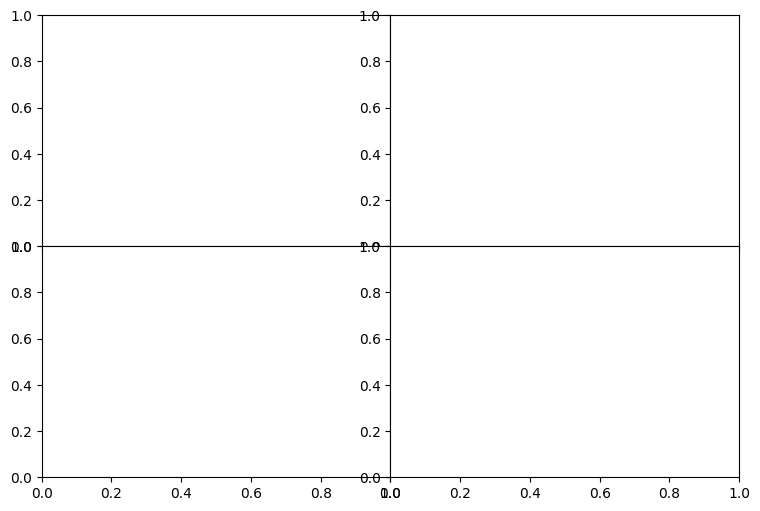

In [23]:
axes_prop_cycle = {
    'markersize':[8]*20,
    'linewidth':[1]*20,
    'markevery': [8]*20,
    'marker':['o', 'X', 's', 'P', 'D']*4,
    'color':sns.color_palette("Set1", 20)
}

def show_results(results, axs, d_type, legend=False):
    bps = axs[0].boxplot(results, vert=False, patch_artist=True)
    axs[0].set_xscale('log')
    axs[0].grid(axis='x')
    axs[0].set_title(r'Distribution type: ' + d_type)
    axs[0].set_yticklabels([])
    
    for i, j, k, l in zip(bps['boxes'], bps['medians'], axes_prop_cycle['marker'][3::-1], axes_prop_cycle['color']):
        i.set_facecolor(l)
        j.set_color('black')
        j.set_marker(k)
        j.set_markevery(1)
        j.set_markerfacecolor(l)
    
    sns.ecdfplot(results, log_scale=True, ax=axs[1], legend=legend, alpha=0.8)
    axs[1].grid()
    axs[1].set_ylim([-0.05, 1.05])
    
    return bps

fig, axs = plt.subplots(2,2, sharex=True, figsize=(9,6), gridspec_kw={'hspace':0.0, 'wspace':0.0})

for e, (i,j) in enumerate(zip(results_dtw, axs.T)):
    zz = show_results(results_dtw[i], j, i, e == 1)
    j[0].set_yticklabels([])
    
    if e:
        j[1].set_yticklabels([])
        j[1].set_ylabel('')
    

axs[1,0].set_ylabel('Cumulative Probability')
axs[1,1].set_xlabel('DTW value')
sns.move_legend(axs[1,1], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.45))

for i, j in zip(axs[1,1].legend_.legendHandles, axes_prop_cycle['marker'][3::-1]): 
    i.set_marker(j)
    i.set_markersize(8)


fig.tight_layout()

# fig.savefig('./data_pdf_files/call_center.pdf')

In [2]:
# methods_colors = {
#     "Reservoir Sampling" : 'r',
#     "GreedyKS" : 'g',
#     "IKS + RS" : 'b',
#     'Page Hinkley': 'yellow'

# }

def show_stats(methods_drifts, methods_times):
    n_drifts = [len(methods_drifts[m]) for m in methods_drifts]
    df = pd.DataFrame([methods_times.values(),n_drifts], index=['time', 'drifts'], columns=methods_times.keys())
    display(df)

In [4]:
for r in results:
    print(r)
    show_stats(*results[r])

fit


,Page Hinkley,GreedyKS,Reservoir Sampling,IKS + RS
time,0.036164,0.716456,0.743053,0.638199
drifts,11.000000,19.000000,19.000000,18.000000


empirical


,Page Hinkley,GreedyKS,Reservoir Sampling,IKS + RS
time,0.035441,1.071255,3.329258,2.440134
drifts,11.000000,20.000000,20.000000,19.000000


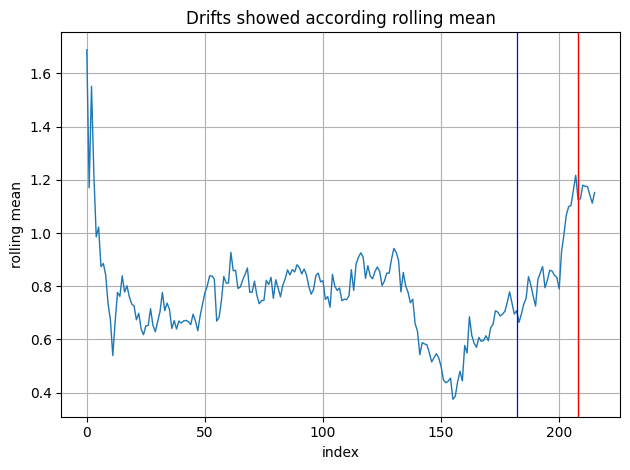

In [ ]:
files = get_file_names()
stream = []
for file in files:
    stream.append(pd.read_csv(file)['Logits_Negative'])
stream = pd.concat(stream, ignore_index=True)


rolling_mean = stream.rolling(len(stream)//10, min_periods=0).mean()

# plt.figure(figsize=(5,3.5))
plt.plot(rolling_mean, linewidth=1)

for m in methods_drifts:
    # if m != 'page hinkley':
    #     continue
    for d in methods_drifts[m]:
        plt.axvline(x = d, color = methods_colors[m], linewidth=0.9, label=m)




plt.title('Drifts showed according rolling mean')
# plt.legend()
plt.xlabel('index')
plt.ylabel('rolling mean')
plt.grid(True)
plt.tight_layout()
plt.show()